In [18]:
import itertools
import pandas as pd
import numpy as np
import json
# import dill as pickle
import pickle

def loss_matrix(p=0.5):
    foods = pd.Series(list(json.load(open("../data/classes.json")).values()))
    food_wine = json.load(open("../data/food_wine.json"))
    food_numbers = [(i, food) for i, food in enumerate(food_wine.keys())]

    confusion_matrix = np.ones((101, 101))
    confusion_matrix -= np.eye(101)
    same_wine = np.zeros((101, 101))
    for (i, f), (j, g) in itertools.combinations(food_numbers, 2):
        if food_wine[f] == food_wine[g]:
            same_wine[i, j] = 1
            same_wine[j, i] = 1

    result = confusion_matrix - p*same_wine
    return result

In [19]:
pickle.dump(loss_matrix, open('loss_matrix.p', 'wb'))

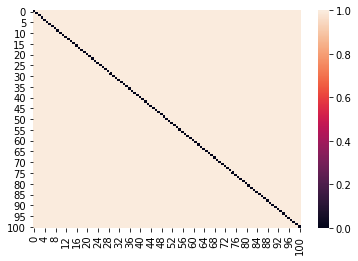

In [29]:
import seaborn as sns
batata = pickle.load(open('loss_matrix.p', 'rb'))
sns.heatmap(batata(0))

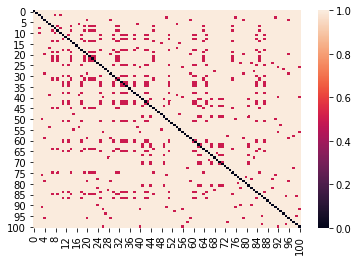

In [31]:
sns.heatmap(batata(0.5))